# Import the required libraries and Define visualization functions

In [179]:
import albumentations as A
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def imshow(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def formannot(filepath):
    import xml.etree.ElementTree as ET
    import numpy as np
    from xml.etree.ElementTree import Element, dump, ElementTree
    
    doc = ET.parse(filepath)
    root = doc.getroot()
    lst = []
    object_tag = root.findall('object')
    for i in range(6):
        objannot = [int(object_tag[i].find('bndbox').findtext('xmin')), 
                   int(object_tag[i].find('bndbox').findtext('ymin')),
                   int(object_tag[i].find('bndbox').findtext('xmax')), 
                   int(object_tag[i].find('bndbox').findtext('ymax')),
                   object_tag[i].find('name').text]
        lst.append(objannot)
    return lst


BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White
def visualize_bbox(img, bbox, color = BOX_COLOR, thickness = 2, **kwargs):
    x_min, y_min, x_max, y_max = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cv2.rectangle(img, (x_min, y_min),(x_max, y_max),color = color, thickness = thickness)
    return img    

def visualize_titles(img, bbox, title, color = BOX_COLOR, thickness = 2, font_thickness = 2, font_scale=0.35, **kwargs):
    x_min, y_min, x_max, y_max = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img

def augment_and_show(aug, image, mask = None, bboxes=[], categories = [], category_id_to_name = [],
                    filename = None, font_scale_orig = 0.35, font_scale_aug = 0.35, show_title = True, **kwargs):
    augmented = aug(image = image, bboxes = bboxes, category_id = categories)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes :
        visualize_bbox(image, bbox, **kwargs)
        
    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)
        
    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    f, ax = plt.subplots(1, 2, figsize=(16, 8))

    ax[0].imshow(image)
    ax[0].set_title('Original image')

    ax[1].imshow(image_aug)
    ax[1].set_title('Augmented image')

    f.tight_layout()

    if filename is not None:
        f.savefig(filename)

    return augmented['image'], augmented['bboxes']

    
    
    
    
    
    

# Basic Augmentation Examples

In [31]:
image = cv2.imread('data/coco_thick2/xml/2_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

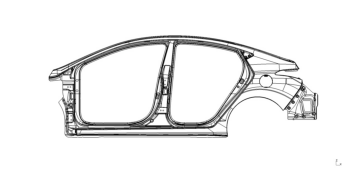

In [32]:
imshow(image)

In [33]:
transformed_image_1 = transform(image=image)['image']
transformed_image_2 = transform(image=image)['image']
transformed_image_3 = transform(image=image)['image']

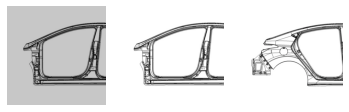

In [56]:
plt.subplot(1,3,1)
plt.imshow(transformed_image_1)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(transformed_image_2)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(transformed_image_3)
plt.axis('off')
plt.show()

# Basic bounding boxes augmentation

In [182]:
# Defining an augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p = 1),
    A.RandomBrightnessContrast(p = 0.2)
], bbox_params = A.BboxParams(format = 'pascal_voc', min_visibility = 0.4))
# min_visibility parameter는 크기가 수정된 박스의 비율중 얼마나 살아남으면 살리는지에 대한 이야기이다

In [70]:
# Import XML Files

import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, dump, ElementTree

doc = ET.parse('data/coco_thick2/xml/2_1.xml')
root = doc.getroot()
root.tag

'annotation'

In [68]:
for i in root :
    print(i.tag, i.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}
object {}
object {}


In [74]:
object_tag = root.findall('object')

In [77]:
object_tag # 6개의 object # name, bndbox

[<Element 'object' at 0x7fd9fc039180>,
 <Element 'object' at 0x7fd9fc039130>,
 <Element 'object' at 0x7fd9fc00ae50>,
 <Element 'object' at 0x7fd9fc00ab30>,
 <Element 'object' at 0x7fd9fc00a7c0>,
 <Element 'object' at 0x7fd9fbffe310>]

In [83]:
for i in range(6):
    print(object_tag[i].find('name').text) # Object의 이름 파싱하기

1
2
3
4
5
6


In [94]:
# Bounding Box Information
for i in range(6):
    print(object_tag[i].find('bndbox').findtext('xmin'), '\t',
         object_tag[i].find('bndbox').findtext('ymin'), '\t',
         object_tag[i].find('bndbox').findtext('xmax'), '\t',
         object_tag[i].find('bndbox').findtext('ymax'), '\t')

464 	 77 	 562 	 136 	
413 	 303 	 534 	 422 	
781 	 207 	 827 	 258 	
848 	 218 	 922 	 333 	
828 	 187 	 913 	 216 	
705 	 186 	 776 	 303 	


In [142]:
bbox = formannot('data/coco_thick2/xml/2_1.xml')
bbox

[[464, 77, 562, 136, '1'],
 [413, 303, 534, 422, '2'],
 [781, 207, 827, 258, '3'],
 [848, 218, 922, 333, '4'],
 [828, 187, 913, 216, '5'],
 [705, 186, 776, 303, '6']]

In [183]:
transformed_image = transform(image = image, bboxes = bbox)['image']
transformed_bboxes = transform(image = image, bboxes = bbox)['bboxes']

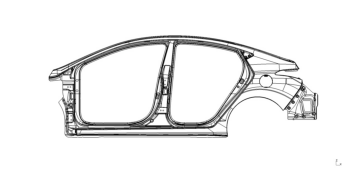

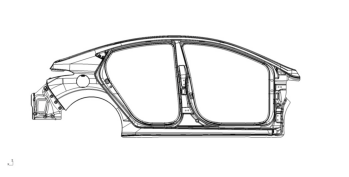

In [184]:
imshow(image)
imshow(transformed_image)

In [185]:
transformed_bboxes

[(478.00000000000006, 77.0, 576.0, 136.0, '1'),
 (506.00000000000006, 303.0, 627.0000000000001, 422.0, '2'),
 (213.00000000000006, 207.0, 259.0, 258.0, '3'),
 (118.00000000000004, 218.0, 192.0, 333.0, '4'),
 (127.00000000000001, 187.0, 212.00000000000006, 216.0, '5'),
 (264.0, 186.0, 334.99999999999994, 303.0, '6')]

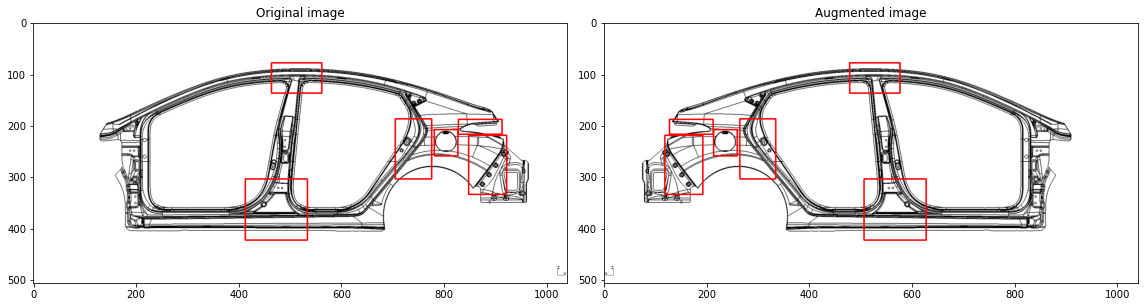

In [186]:
aug_img , aug_bbox = augment_and_show(transform, image, bboxes = formannot('data/coco_thick2/xml/2_1.xml'))

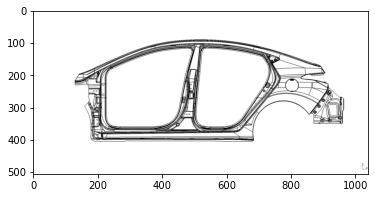

In [181]:
plt.imshow(aug_img)